In [9]:
import cv2,sys,os
import numpy as np
from Algorithm.lbph import getLBPimage,blockshaped,histogram
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from skimage import io

In [10]:
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

In [12]:
datasets = './Data/Celeb/Train'

(height,width) = (70,70)
(images,labels,names,id) = ([],[],{},0)

for (subdirs,dirs,files) in os.walk(datasets):
        for subdir in dirs:
            names[id]=subdir
            subjectpath=os.path.join(datasets,subdir)
            for filename in os.listdir(subjectpath):
                path=subjectpath+'/'+filename
                lable=id
                img = cv2.imread(path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray,1.3,4)
                for (x,y,w,h) in faces:
                    face = gray[y:y+h,x:x+w]
#                     print(face.shape)
                    face = cv2.resize(face,(width,height))
#                     print(face.shape)
                    images.append(face)
                    labels.append(int(lable))
            id+=1
        break

In [13]:
len(images)

76

In [14]:
id

5

In [17]:
(X_train,y_train) = [np.array(lis) for lis in [images,labels]]

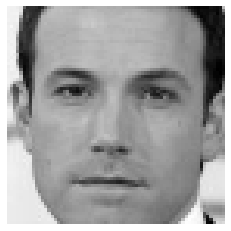

In [21]:
sample = X_train[0]
plt.imshow(sample,cmap='gray')
plt.axis('off')
plt.show()

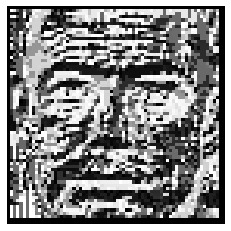

In [22]:
lbp_image = getLBPimage(sample)
plt.imshow(lbp_image,cmap='gray')
plt.axis('off')
plt.show()

In [23]:
shaped = blockshaped(lbp_image,10,13)
    
xBlocks = []
for s in shaped:
    xBlocks.append(histogram(s))
lbph = np.concatenate(xBlocks)

plt.hist(lbph,bins=2**8)
plt.xticks([])
plt.yticks([])
plt.show()

ValueError: cannot reshape array of size 4900 into shape (7,10,newaxis,13)